Modelin performansı:
MSE:  0.09384893336371243
R-kare:  0.910845460089525


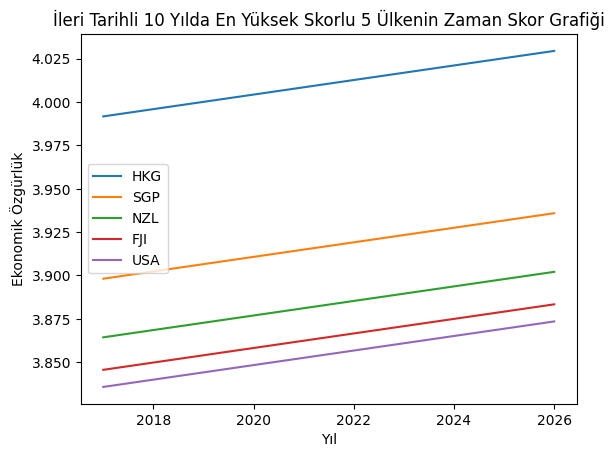

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import warnings

# Uyarıları gizle
warnings.filterwarnings("ignore")
# Veri setini yükle
data = pd.read_csv("/content/efw_cc.csv")


data.fillna(data.mean(), inplace=True)

# Kategorik verileri sayısal verilere dönüştür
data = pd.get_dummies(data, columns=['ISO_code'])
data = data[['year', 'ECONOMIC FREEDOM', 'rank', 'quartile', '1a_government_consumption','1_size_government' ,'2a_judicial_independence', '2e_integrity_legal_system', '3_sound_money','4d_control_movement_capital_ppl'] + [col for col in data.columns if 'ISO_code' in col]]

# Bağımsız ve bağımlı değişkenleri ayır
X = data.drop('ECONOMIC FREEDOM', axis=1)
y = data['ECONOMIC FREEDOM']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

# Modelin performansını 
y_pred = model.predict(X_test)
mse = ((y_pred - y_test) ** 2).mean()
r2 = model.score(X_test, y_test)
print("Modelin performansı:")
print("MSE: ", mse)
print("R-kare: ", r2)

# İleri tarihli 10 yılın yıllarını oluşturma
future_years = range(data['year'].max() + 1, data['year'].max() + 11)

# Tahmin yaparken modeli güncelleme
iso_codes = [col for col in data.columns if 'ISO_code' in col]
predicted_values = {}

for iso_code in iso_codes:
    predicted_values[iso_code] = []

    for future_year in future_years:
        X_future = X.append({'year': future_year, 'rank': 0, 'quartile': 0, '1a_government_consumption': 0, '2a_judicial_independence': 0, '2e_integrity_legal_system': 0, '3_sound_money': 0, '4d_control_movement_capital_ppl': 0, iso_code: 1}, ignore_index=True)
        X_future.fillna(0, inplace=True)
        
        # Tahmin yapma
        predicted_value = model.predict(X_future.iloc[[-1]])
        predicted_values[iso_code].append(predicted_value[0])

# En yüksek skorlu 5 ülkeyi bulma
top_5_countries = sorted(predicted_values, key=lambda x: predicted_values[x][-1], reverse=True)[:5]

# Zaman skor grafiği çizme
for country in top_5_countries:
    plt.plot(future_years, predicted_values[country], label=country.replace("ISO_code_", ""))

plt.xlabel('Yıl')
plt.ylabel('Ekonomik Özgürlük')
plt.title('İleri Tarihli 10 Yılda En Yüksek Skorlu 5 Ülkenin Zaman Skor Grafiği')
plt.legend()
plt.show()



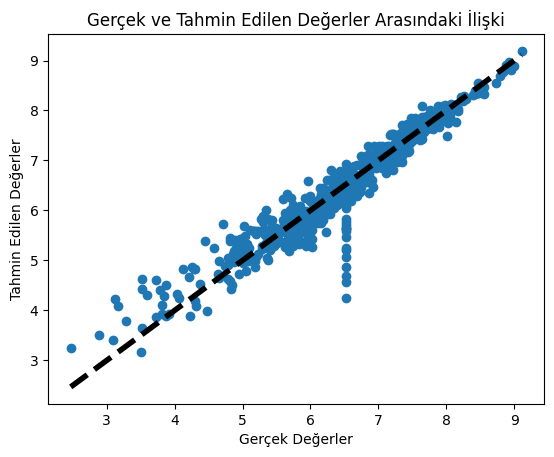

Modelin performansı:
MSE:  0.09384893336371243
R-kare:  0.910845460089525


In [34]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
mse = ((y_pred - y_test) ** 2).mean()
r2 = model.score(X_test, y_test)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerler Arasındaki İlişki')
plt.show()

print("Modelin performansı:")
print("MSE: ", mse)
print("R-kare: ", r2)


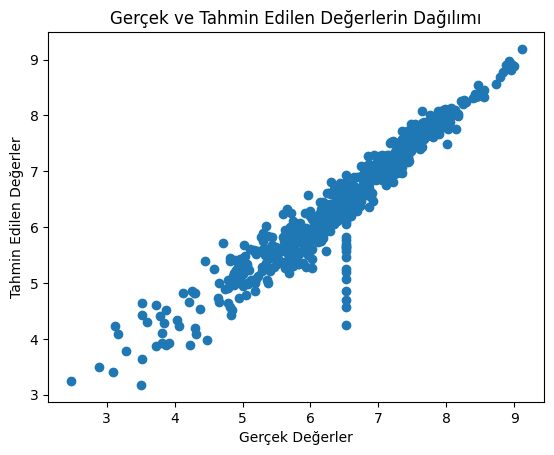

Modelin performansı:
MSE:  0.09384893336371243
R-kare:  0.910845460089525


In [35]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
mse = ((y_pred - y_test) ** 2).mean()
r2 = model.score(X_test, y_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Dağılımı')
plt.show()

print("Modelin performansı:")
print("MSE: ", mse)
print("R-kare: ", r2)


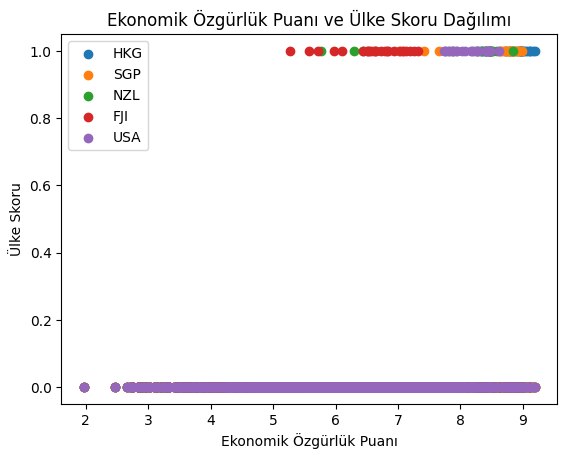

In [36]:
for country in top_5_countries:
    plt.scatter(data['ECONOMIC FREEDOM'], data[country], label=country.replace("ISO_code_", ""))

plt.xlabel('Ekonomik Özgürlük Puanı')
plt.ylabel('Ülke Skoru')
plt.title('Ekonomik Özgürlük Puanı ve Ülke Skoru Dağılımı')
plt.legend()
plt.show()


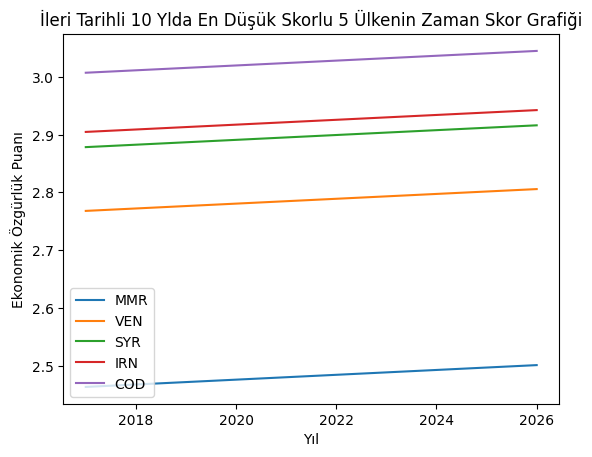

In [37]:
top_5_countries = sorted(predicted_values, key=lambda x: predicted_values[x][-1], reverse=False)[:5]

# Zaman skor grafiği çizme
for country in top_5_countries:
    plt.plot(future_years, predicted_values[country], label=country.replace("ISO_code_", ""))

plt.xlabel('Yıl')
plt.ylabel('Ekonomik Özgürlük Puanı')
plt.title('İleri Tarihli 10 Ylda En Düşük Skorlu 5 Ülkenin Zaman Skor Grafiği')
plt.legend()
plt.show()

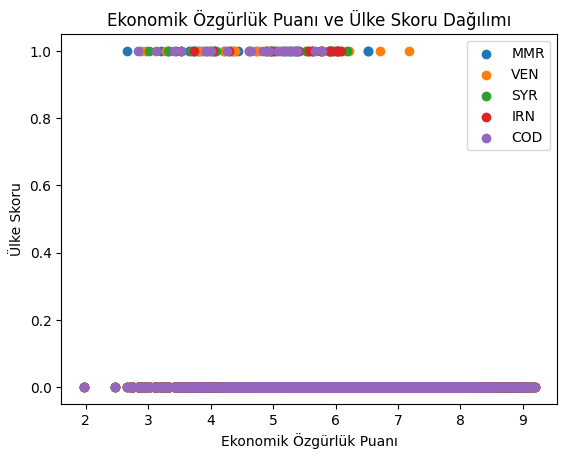

In [38]:
for country in top_5_countries:
    plt.scatter(data['ECONOMIC FREEDOM'], data[country], label=country.replace("ISO_code_", ""))

plt.xlabel('Ekonomik Özgürlük Puanı')
plt.ylabel('Ülke Skoru')
plt.title('Ekonomik Özgürlük Puanı ve Ülke Skoru Dağılımı')
plt.legend()
plt.show()

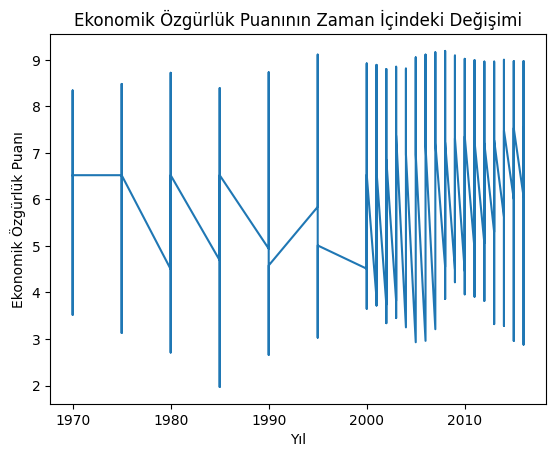

In [39]:

plt.plot(data['year'], data['ECONOMIC FREEDOM'])
plt.xlabel('Yıl')
plt.ylabel('Ekonomik Özgürlük Puanı')
plt.title('Ekonomik Özgürlük Puanının Zaman İçindeki Değişimi')
plt.show()


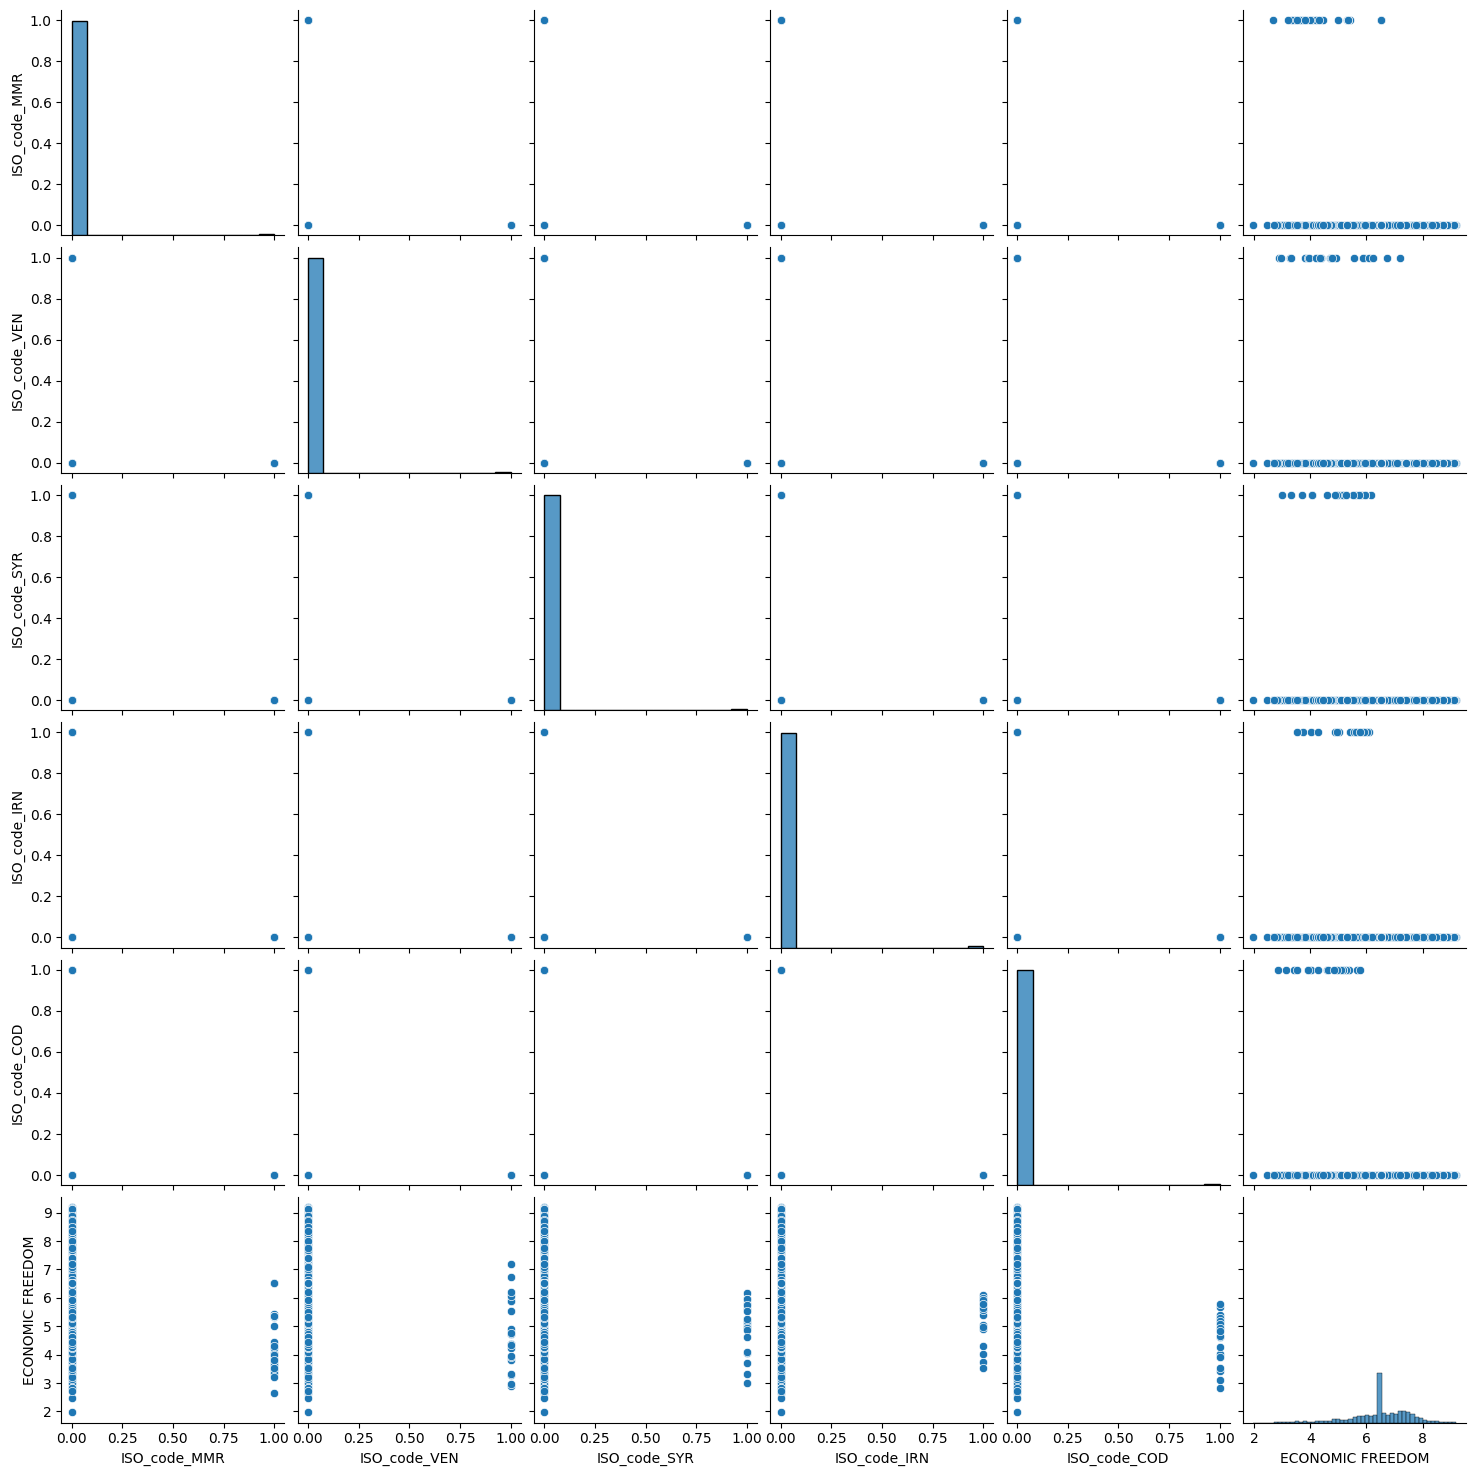

In [40]:
sns.pairplot(data[top_5_countries + ['ECONOMIC FREEDOM']])
plt.show()

